# MLToolKit Image Data Example

Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)

### Current release: PyMLToolKit [v0.1.9]

MLToolkit (mltk) is a Python package providing a set of user-friendly functions to help building machine learning models in data science research, teaching or production focused projects. MLToolkit supports all stages of the machine learning application development process.

### Installation
```
pip install pymltoolkit
```
If the installation failed with dependancy issues, execute the above command with --no-dependencies

```
pip install pymltoolkit --no-dependencies
```

In [1]:
import mltk

mltk==0.1.9


## Demo

In [28]:
size=(96, 64)
file_folder_path = r'C:\Projects\Data\images\train'
ImagesDataFrame = mltk.read_image_folder(file_folder_path, size=size, show_image=False)
ImagesDataFrame.head()

,Path,FileName,Image,Label
0,C:\Projects\Data\images\train,1000_c.png,"[[37, 40, 37, 37, 40, 37, 36, 36, 35, 36, 39, ...",None
1,C:\Projects\Data\images\train,1000_v.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",None
2,C:\Projects\Data\images\train,1001_c.png,"[[25, 27, 29, 28, 27, 31, 30, 30, 33, 34, 29, ...",None
3,C:\Projects\Data\images\train,1001_v.png,"[[8, 10, 27, 52, 26, 51, 45, 9, 8, 7, 12, 8, 3...",None
4,C:\Projects\Data\images\train,1002_c.png,"[[10, 9, 10, 16, 11, 13, 16, 12, 9, 13, 12, 10...",None


In [29]:
ImagesDataFrame['id'] = ImagesDataFrame['FileName'].str.extract(r'(\d*)_\w*').astype('int')
ImagesDataFrame['mesurement'] = ImagesDataFrame['FileName'].str.extract(r'\d*_(\w)')
ImagesDataFrame.head()

,Path,FileName,Image,Label,id,mesurement
0,C:\Projects\Data\images\train,1000_c.png,"[[37, 40, 37, 37, 40, 37, 36, 36, 35, 36, 39, ...",None,1000,c
1,C:\Projects\Data\images\train,1000_v.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",None,1000,v
2,C:\Projects\Data\images\train,1001_c.png,"[[25, 27, 29, 28, 27, 31, 30, 30, 33, 34, 29, ...",None,1001,c
3,C:\Projects\Data\images\train,1001_v.png,"[[8, 10, 27, 52, 26, 51, 45, 9, 8, 7, 12, 8, 3...",None,1001,v
4,C:\Projects\Data\images\train,1002_c.png,"[[10, 9, 10, 16, 11, 13, 16, 12, 9, 13, 12, 10...",None,1002,c


In [30]:
ImageLabels = mltk.read_data_csv(r'C:\Projects\Data\images\train_labels.csv')
ImageLabels.head()

576 records were loaded. execute time = 0.004214699999920413 s


,id,appliance
0,1000,4
1,1001,9
2,1002,4
3,1003,9
4,1004,6


In [31]:
classes = {
    0:'Heater',
    1:'Fridge', 
    2:'Hairdryer',
    3:'Microwave',
    4:'Air Conditioner',
    5:'Vacuum',
    6:'Incandescent Light Bulb',
    7:'Laptop',
    8:'Compact Fluorescent Lamp',
    9:'Fan',
    10:'Washing Machine'
    }

In [32]:
ImagesDataFrame = ImagesDataFrame.merge(ImageLabels, on='id', how='left')
ImagesDataFrame['Label'] = (ImagesDataFrame['appliance']==4).values
ImagesDataFrame['Label'] = ImagesDataFrame['Label'].astype('int')
ImagesDataFrame.head()

,Path,FileName,Image,Label,id,mesurement,appliance
0,C:\Projects\Data\images\train,1000_c.png,"[[37, 40, 37, 37, 40, 37, 36, 36, 35, 36, 39, ...",1,1000,c,4
1,C:\Projects\Data\images\train,1000_v.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,1000,v,4
2,C:\Projects\Data\images\train,1001_c.png,"[[25, 27, 29, 28, 27, 31, 30, 30, 33, 34, 29, ...",0,1001,c,9
3,C:\Projects\Data\images\train,1001_v.png,"[[8, 10, 27, 52, 26, 51, 45, 9, 8, 7, 12, 8, 3...",0,1001,v,9
4,C:\Projects\Data\images\train,1002_c.png,"[[10, 9, 10, 16, 11, 13, 16, 12, 9, 13, 12, 10...",1,1002,c,4


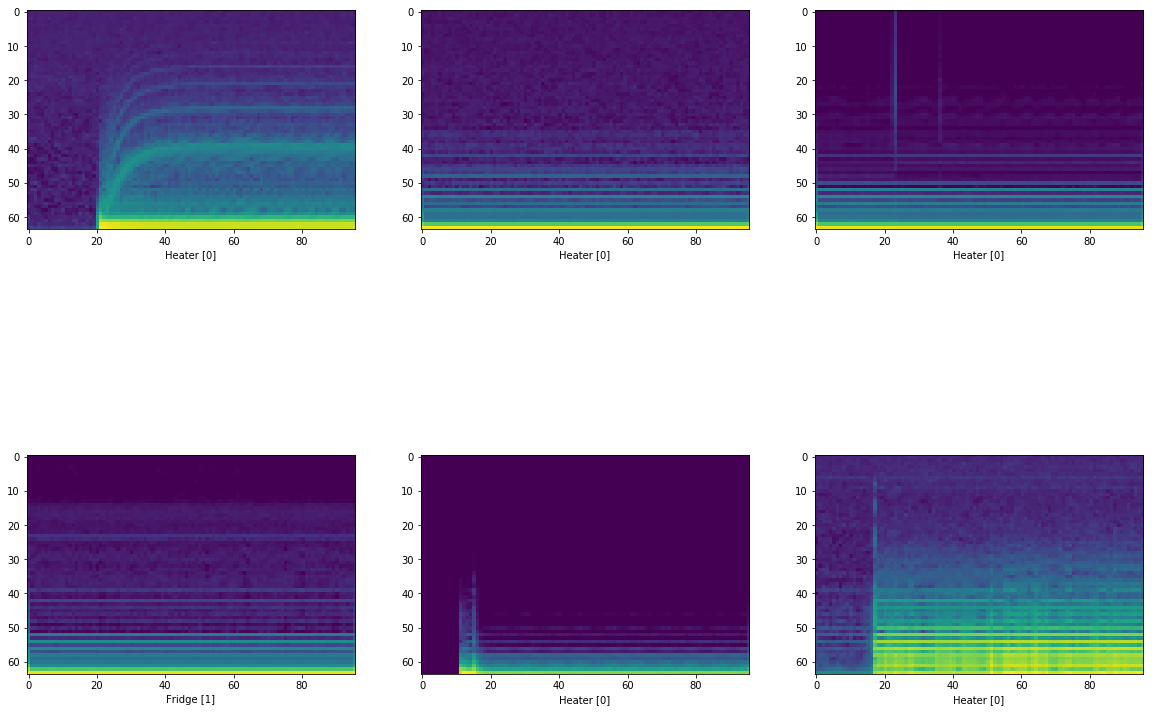

In [33]:
mltk.preview_image_dataset_to_model(ImagesDataFrame, image_column='Image', label_column='Label', classes=classes, n_samples=6)

In [34]:
ImagesDataFrame, input_shape = mltk.prepare_image_dataset_to_model(ImagesDataFrame, 
                                                             image_column='Image', 
                                                             processed_image_column='ImageToModel',
                                                             label_column='Label',
                                                             image_data_format='channels_last', 
                                                             size=size)

In [35]:
TrainDataset, ValidateDataset, TestDataset = mltk.train_validate_test_split(ImagesDataFrame, ratios=(0.7,0.3))

Validate = Test
Train Samples: 806 [70.0%]
Validate Samples: 346 [30.0%]
Test Samples: 346 [30.0%]


In [36]:
n_classes = 2
NClasses=n_classes
inputShape = input_shape
modelVariables = ['ImageToModel']
targetVariable = 'Label'
identifierColumns = ['id']
modelDataStats = None

In [37]:
sample_attributes = {'SampleDescription':'Image CLassification Example',
                    'NumClasses':NClasses,
                    'RecordIdentifiers':identifierColumns,
                    'ModelDataStats':modelDataStats
                    }

score_parameters = {'Edges':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'Percentiles':[0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0],
                    'Threshold':0.5,
                   'Quantiles':10,
                   'ScoreVariable':'Probability',
                   'ScoreLabel':'Score',
                   'QuantileLabel':'Quantile',
                   'PredictedLabel':'Predicted'
                   }

model_attributes = {
                    'ModelID': None,   
                    'ModelType':'classification',
                    'ModelName': 'IncomeLevel',
                    'Version':'0.1',
                   }

In [43]:
architecture = {
        'L1':{'type': 'Conv2D', 'position':'input', 'filters':32, 'kernel_size':(3,3), 'padding':'same', 'strides':(1,1), 'activation':'relu', 'input_shape':input_shape},
        'L2':{'type': 'MaxPooling2D', 'pool_size': (2,2), 'padding':'same'},
        'L3':{'type': 'Dropout', 'position':'hidden', 'rate':0.2},
        'L4':{'type': 'Conv2D', 'position':'hidden', 'filters':64, 'kernel_size':(3,3), 'padding':'same', 'strides':(1,1), 'activation':'relu'},
        'L5':{'type': 'MaxPooling2D', 'pool_size': (2,2), 'padding':'same'},
        'L6':{'type': 'Dropout', 'position':'hidden', 'rate':0.2},
        'L10':{'type': 'Flatten'},
        'L11':{'type': 'Dense', 'position':'hidden', 'units': 256, 'activation':'softmax', 'output_shape':None},
        'L12':{'type': 'Dropout', 'position':'hidden', 'rate':0.2},
        'L13':{'type': 'Dense', 'position':'output', 'units': n_classes, 'activation':'softmax', 'output_shape':None},
       }

'''
        'L7':{'type': 'Conv2D', 'position':'hidden', 'filters':128, 'kernel_size':(3,3), 'padding':'same', 'strides':(1,1), 'activation':'relu'},
        'L8':{'type': 'MaxPooling2D', 'pool_size': (2,2), 'padding':'same'},
        'L9':{'type': 'Dropout', 'position':'hidden', 'rate':0.2},
'''

"\n        'L7':{'type': 'Conv2D', 'position':'hidden', 'filters':128, 'kernel_size':(3,3), 'padding':'same', 'strides':(1,1), 'activation':'relu'},\n        'L8':{'type': 'MaxPooling2D', 'pool_size': (2,2), 'padding':'same'},\n        'L9':{'type': 'Dropout', 'position':'hidden', 'rate':0.2},\n"

Train samples: 806 loded...
Validate samples: 346 loded...
Test samples: 346 loded...
{'ModelID': 'INCOMELEVELCNN20191207234553', 'ModelType': 'classification', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'MLTKVersion': '0.1.9', 'BuiltTime': '20191207234553', 'ModelFitTime': -1}
{'MLAlgorithm': 'CNN', 'BatchSize': 128, 'InputShape': (96, 64, 1), 'NumClasses': 2, 'Epochs': 50, 'EvalMatrics': ['accuracy'], 'Architecture': {'L1': {'type': 'Conv2D', 'position': 'input', 'filters': 32, 'kernel_size': (3, 3), 'padding': 'same', 'strides': (1, 1), 'activation': 'relu', 'input_shape': (96, 64, 1)}, 'L2': {'type': 'MaxPooling2D', 'pool_size': (2, 2), 'padding': 'same'}, 'L3': {'type': 'Dropout', 'position': 'hidden', 'rate': 0.2}, 'L4': {'type': 'Conv2D', 'position': 'hidden', 'filters': 64, 'kernel_size': (3, 3), 'padding': 'same', 'strides': (1, 1), 'activation': 'relu'}, 'L5': {'type': 'MaxPooling2D', 'pool_size': (2, 2), 'padding': 'same'}, 'L6': {'type': 'Dropout', 'position': 'hidden', 

806/806 [==============================] - ETA: 1s - loss: 0.4143 - acc: 0.828 - ETA: 1s - loss: 0.4216 - acc: 0.820 - ETA: 1s - loss: 0.4403 - acc: 0.804 - ETA: 0s - loss: 0.4419 - acc: 0.808 - ETA: 0s - loss: 0.4321 - acc: 0.818 - ETA: 0s - loss: 0.4344 - acc: 0.812 - 3s 3ms/sample - loss: 0.4372 - acc: 0.8114 - val_loss: 0.4484 - val_acc: 0.7861
Epoch 37/50
806/806 [==============================] - ETA: 1s - loss: 0.4548 - acc: 0.835 - ETA: 1s - loss: 0.4678 - acc: 0.800 - ETA: 1s - loss: 0.4521 - acc: 0.812 - ETA: 0s - loss: 0.4430 - acc: 0.806 - ETA: 0s - loss: 0.4310 - acc: 0.817 - ETA: 0s - loss: 0.4411 - acc: 0.812 - 3s 3ms/sample - loss: 0.4460 - acc: 0.8114 - val_loss: 0.4761 - val_acc: 0.7861
Epoch 38/50
806/806 [==============================] - ETA: 2s - loss: 0.4750 - acc: 0.804 - ETA: 1s - loss: 0.4357 - acc: 0.812 - ETA: 1s - loss: 0.4206 - acc: 0.812 - ETA: 0s - loss: 0.4336 - acc: 0.804 - ETA: 0s - loss: 0.4315 - acc: 0.809 - ETA: 0s - loss: 0.4257 - acc: 0.812 - 3s 

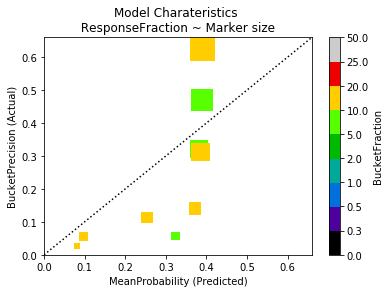

In [44]:
model_parameters = {'MLAlgorithm':'CNN',
                    'BatchSize':128,
                   'InputShape':inputShape,
                   'NumClasses':NClasses,
                   'Epochs':50,
                   'EvalMatrics':['accuracy'],
                   'Architecture':architecture} 

NNModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [40]:
NNModel.get_robustness_table()

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.0972,0.1090,0.0984,35,0,0.1012,0.0000,0.0000,1.0000,1.0000,0.2139
2,0.1108,0.2290,0.1637,35,3,0.1012,0.0405,0.0857,0.8988,1.0000,0.2379
3,0.2348,0.3048,0.2758,34,1,0.0983,0.0135,0.0294,0.7977,0.9595,0.2572
4,0.3050,0.3338,0.3209,35,3,0.1012,0.0405,0.0857,0.6994,0.9459,0.2893
5,0.3338,0.3396,0.3372,34,7,0.0983,0.0946,0.2059,0.5983,0.9054,0.3237
6,0.3396,0.3414,0.3405,35,16,0.1012,0.2162,0.4571,0.5000,0.8108,0.3468
7,0.3416,0.3431,0.3425,34,15,0.0983,0.2027,0.4412,0.3988,0.5946,0.3188
8,0.3431,0.3447,0.3437,35,10,0.1012,0.1351,0.2857,0.3006,0.3919,0.2788
9,0.3447,0.3472,0.3458,34,6,0.0983,0.0811,0.1765,0.1994,0.2568,0.2754


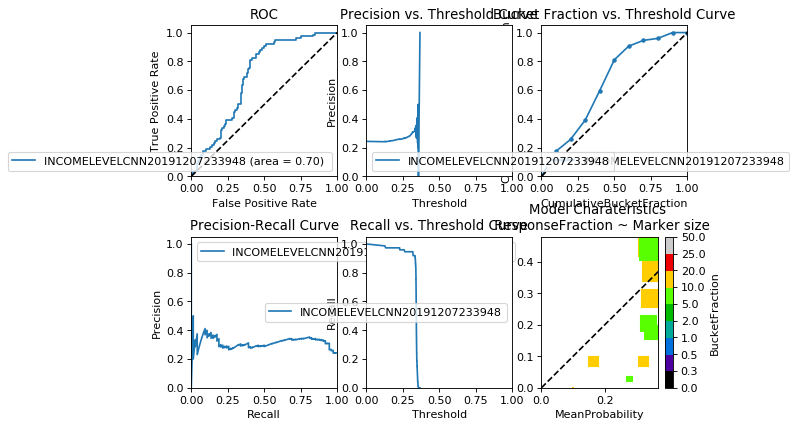

In [42]:
NNModel.plot_eval_matrics()

## Cite as
```
@misc{mltk2019,
  author =  "Sumudu Tennakoon",
  title = "MLToolKit(mltk): A Simplified Toolkit for End-To-End Machine Learing Projects",
  year = 2019,
  publisher = "GitHub",
  howpublished = {\url{https://mltoolkit.github.io/mltk/}},
  version = "0.1.9"
}
```

<hr>
This notebook and related materials were developed by Sumudu Tennakoon to demostrate the MLToolkit python library and its interoperability with the standared Python data analysis and machine learning packages (e.g. Pandas, Sci-kitlearn, Statsmodel, TensorFlow, Catboost, etc.)
Create Date: July 01, 2018; Last Update: December 07, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)